## Automação de processos com Python

#### Dividir para conquistar - quebrar a complexibilidade

- Buscar automaticamente os dados das ações
- Gerar as análises de forma automática
- Enviar um email para o nosso gestor

Passo 1 - Buscar os dados - Python não precisa reinventar a roda

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance

C:\Users\gmap\AppData\Roaming\Python\Python39\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Digite o codigo da acao desejada: PETR4.SA


<AxesSubplot:xlabel='Date'>

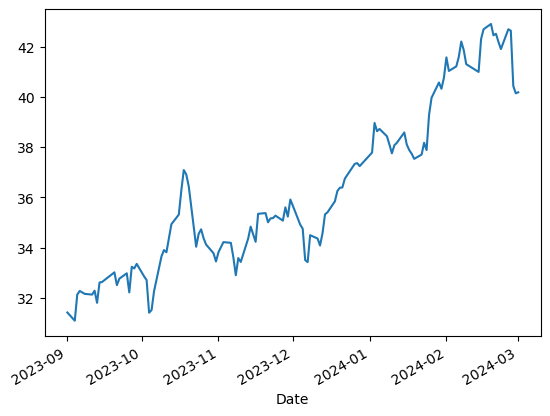

In [3]:
# 6 meses 
# Petrobras: PETR4.SA 
# Banco do Brasil BBAS3.SA
codigo = input("Digite o codigo da acao desejada: ")
dados = yfinance.Ticker(codigo).history("6mo") 
fechamento = dados.Close
# faz grafico
fechamento.plot()


## Passo 2 - Gerar as annálises de forma automática

- Análise dos últimos 6 meses
- Cotação máxima
- Cotação mímina
- Cotação atual

In [78]:
maxima = fechamento.max()
minima = fechamento.min()
# acessando index last value
atual = fechamento[-1]

## Passso 3 - enviar um email


In [47]:
!pip install pyautogui

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 61.2/61.2 kB 181.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 168.2/168.2 kB 562.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


In [49]:
import pyautogui
import pyperclip

In [79]:
# add um delay para esperar o carregamento das paginas
pyautogui.PAUSE = 3

# abrir uma nova aba no navegador - CTRL + t
pyautogui.hotkey('ctrl', 't')

# digitar https://mail.google.com/mail/u/1/
pyperclip.copy("https://mail.google.com/mail/u/1/")
pyautogui.hotkey('ctrl', 'v')
pyautogui.hotkey("enter")

# clicar botao escrever
pyautogui.click(x=2526, y=246)

# colocar email do destinatário (tab)
pyperclip.copy("geraldo.filho92@yahoo.com.br")
pyautogui.hotkey('ctrl', 'v')
pyautogui.hotkey("tab")

# colocar assunto (tab)
pyperclip.copy("Python automação - Análise de dados")
pyautogui.hotkey('ctrl', 'v')
pyautogui.hotkey("tab")

# corpo do email

    # adicionar entre 3 aspas para quebrar as linhas
emailbody = f"""
Prezado gestor,

Seguem as análises diárias dos últimos seis meses da ação {codigo}:

Cotação máxima: R${round(maxima, 2)}
Cotação mínima: R${round(minima, 2)}
Cotação atual:  R${round(atual)}


Qualquer dúvida, fico à disposição.
"""

pyperclip.copy(emailbody)
pyautogui.hotkey('ctrl', 'v')

# clicar no botão enviar
pyautogui.click(x=4029, y=1239)


In [75]:
import time
# python sleep 5s, 

time.sleep(5)
# enquanto isso posicionar o cursor onde deseja obter as coordenadas com pyautogui.position()
pyautogui.position()


Point(x=4029, y=1239)